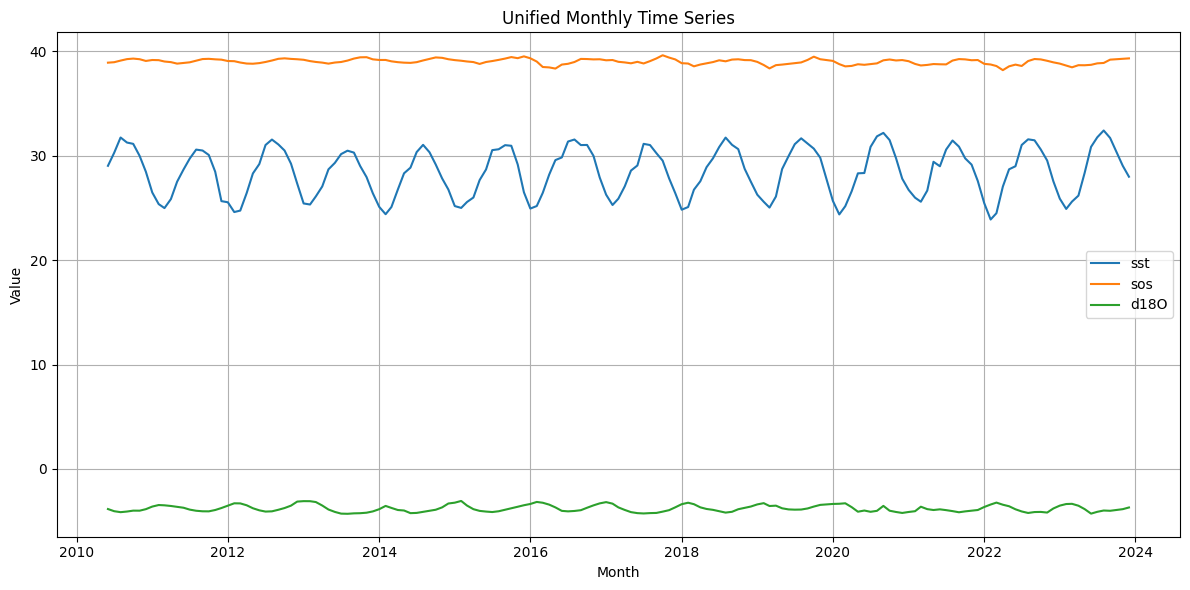

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the unified dataset
df = pd.read_csv("unified_datasets.csv")
df["month"] = pd.to_datetime(df["month"].astype(str))  # convert Period to datetime for plotting
df = df.dropna()

# Plot each column
plt.figure(figsize=(12, 6))
for col in df.columns:
    if col != "month" and col != "sss":
        plt.plot(df["month"], df[col], label=col)

plt.title("Unified Monthly Time Series")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

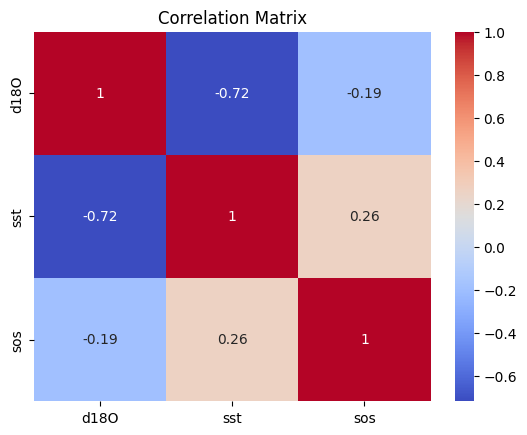

In [16]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Complementary Salinity Data
correlation_matrix = df[['d18O', 'sst', 'sos']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     84.79
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           9.63e-26
Time:                        21:28:31   Log-Likelihood:                 13.406
No. Observations:                 161   AIC:                            -20.81
Df Residuals:                     158   BIC:                            -11.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.018   -213.549      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/3674796952.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/3674796952.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


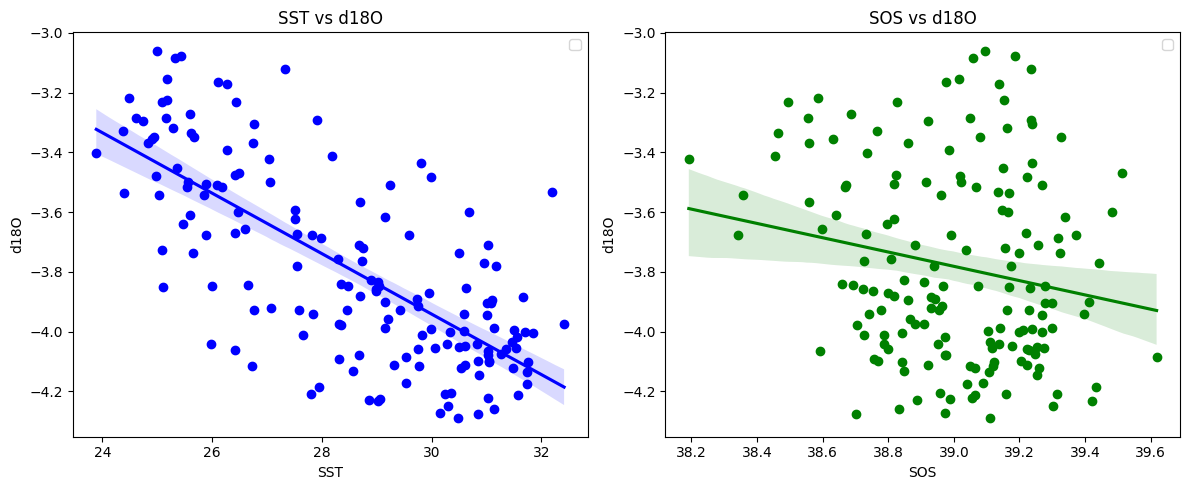

In [17]:
# Multiple Linear Regression
X = df[['sst', 'sos']]
y = df['d18O']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(df['sst'], df['d18O'], color='blue')
sns.regplot(x='sst', y='d18O', data=df, scatter=False, ax=axs[0], color='blue', line_kws={'label': 'Best Fit Line'})
axs[0].legend()
axs[0].set_title("SST vs d18O")
axs[0].set_xlabel("SST")
axs[0].set_ylabel("d18O")

axs[1].scatter(df['sos'], df['d18O'], color='green')
sns.regplot(x='sos', y='d18O', data=df, scatter=False, ax=axs[1], color='green', line_kws={'label': 'Best Fit Line'})
axs[1].legend()
axs[1].set_title("SOS vs d18O")
axs[1].set_xlabel("SOS")
axs[1].set_ylabel("d18O")

plt.tight_layout()
plt.show()

In [18]:
X_sst = sm.add_constant(df['sst'])
model_sst = sm.OLS(df['d18O'], X_sst).fit()
print("R² for SST only:", model_sst.rsquared)

X_salinity = sm.add_constant(df['sos'])
model_salinity = sm.OLS(df['d18O'], X_salinity).fit()
print("R² for SOS only:", model_salinity.rsquared)

R² for SST only: 0.5176329760703327
R² for SOS only: 0.03679775813140551


# Results

**Statistically significant** negative correlation between SST and d18O.
- Pearson correlation of $-0.72$.
- Slope coefficient of $-0.2337$.
- $p < 0.001$.

Statistically *in*significant negative correlation between SOS and d18O.
- Pearson correlation of $-0.2301$.
- Slope coefficient of $-0.0022$.
- $p = 0.904 > 0.05$.

In [19]:
# Create lagged features for comp salinity
dataframes = {}
for i in range(-5, 6):
    if i != 0:
        copy = df.copy()
        copy['sos'] = df['sos'].shift(-i).fillna(method='ffill')
        copy = copy.dropna(subset=['d18O', 'sst', 'sos'])
        dataframes[i] = copy

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1526302745.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copy['sos'] = df['sos'].shift(-i).fillna(method='ffill')


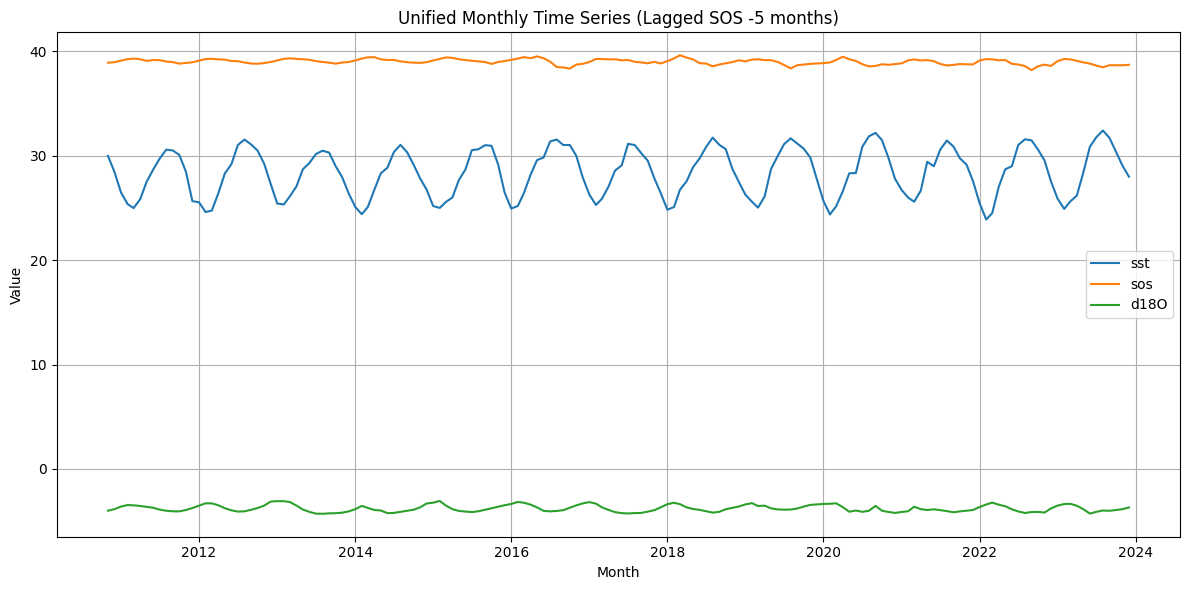

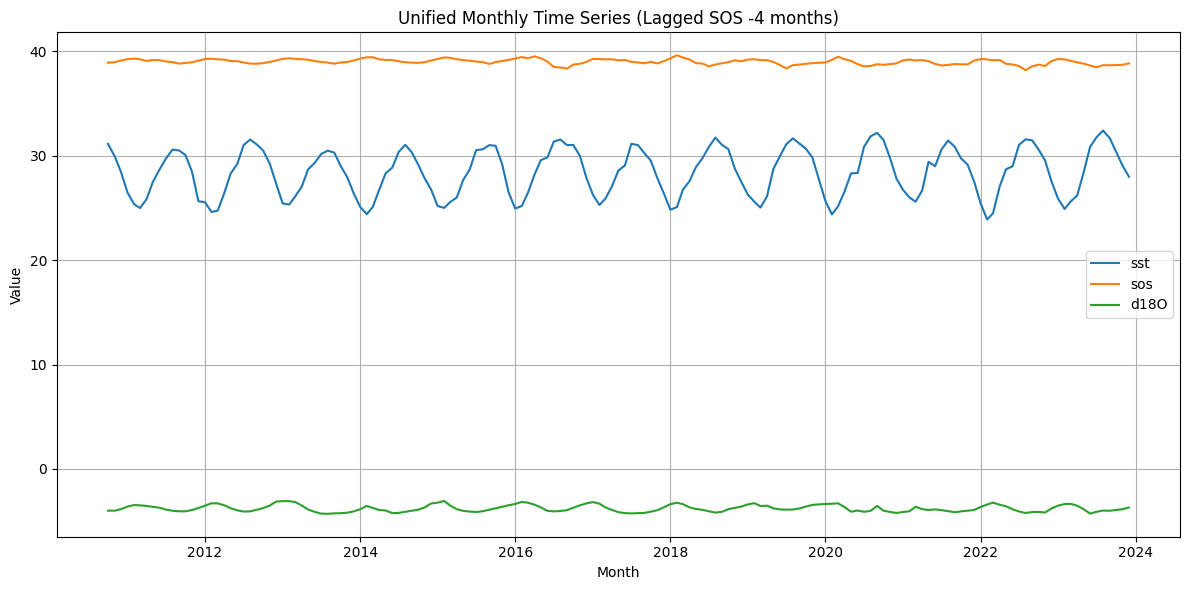

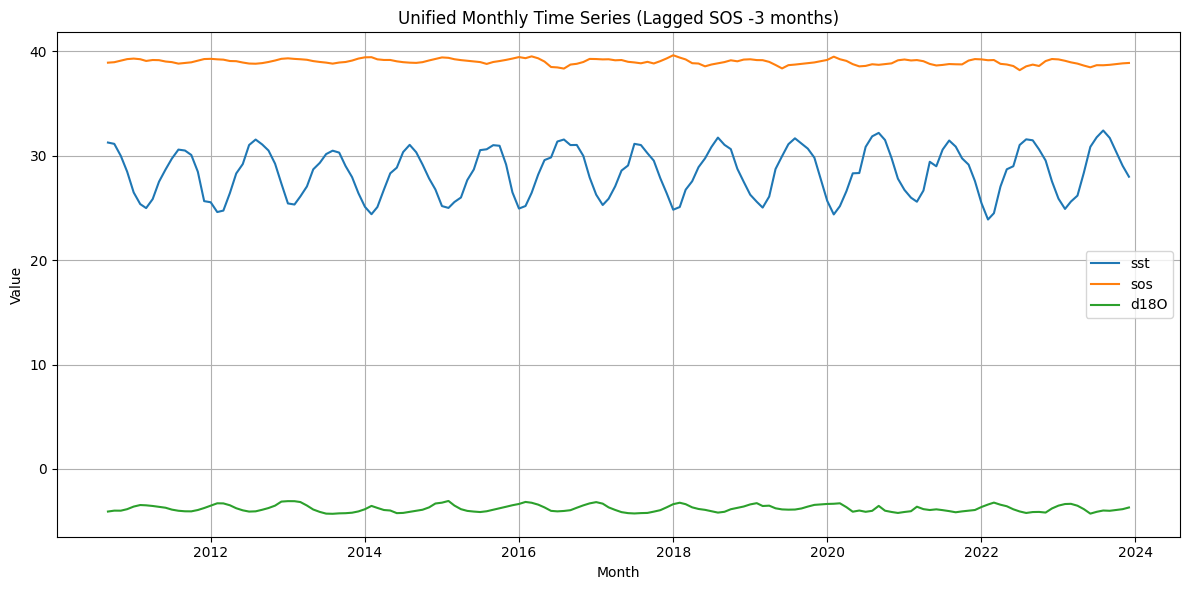

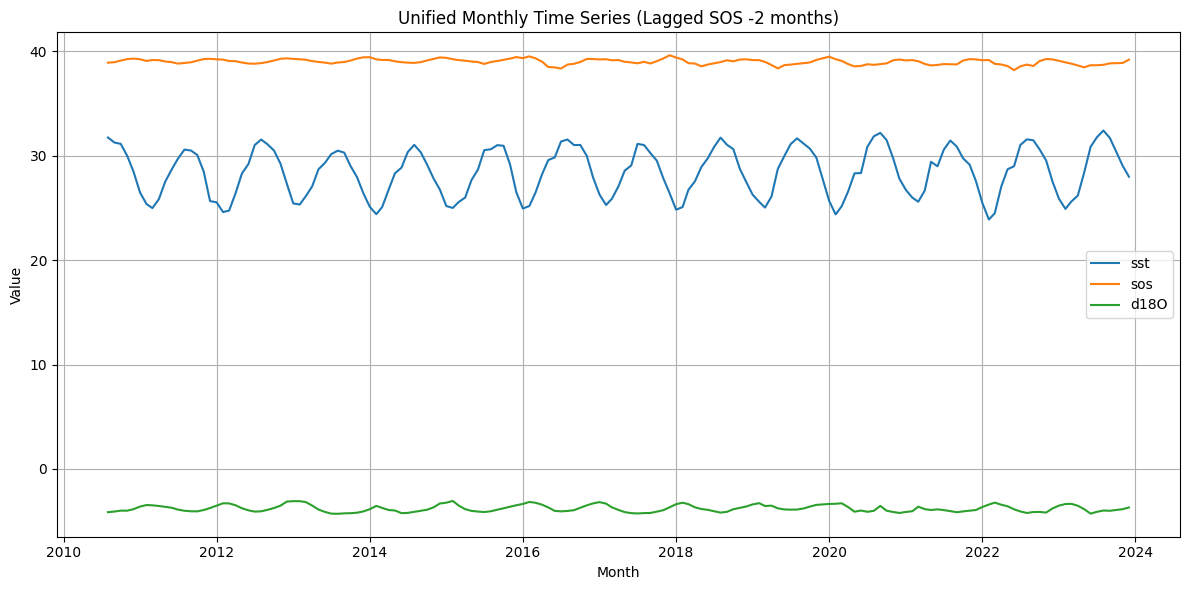

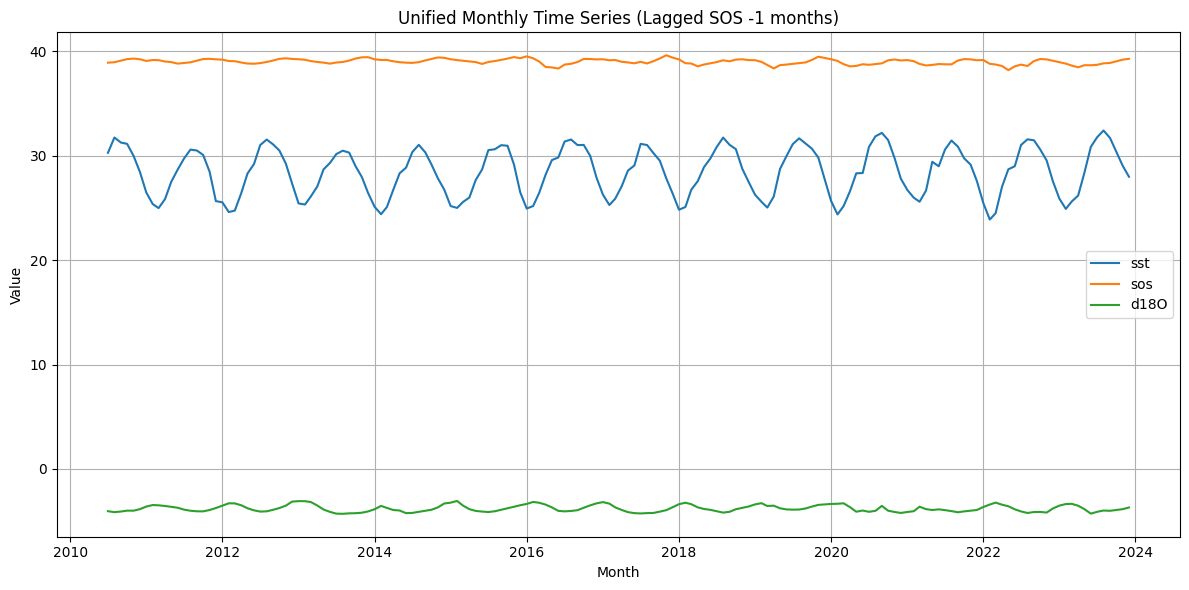

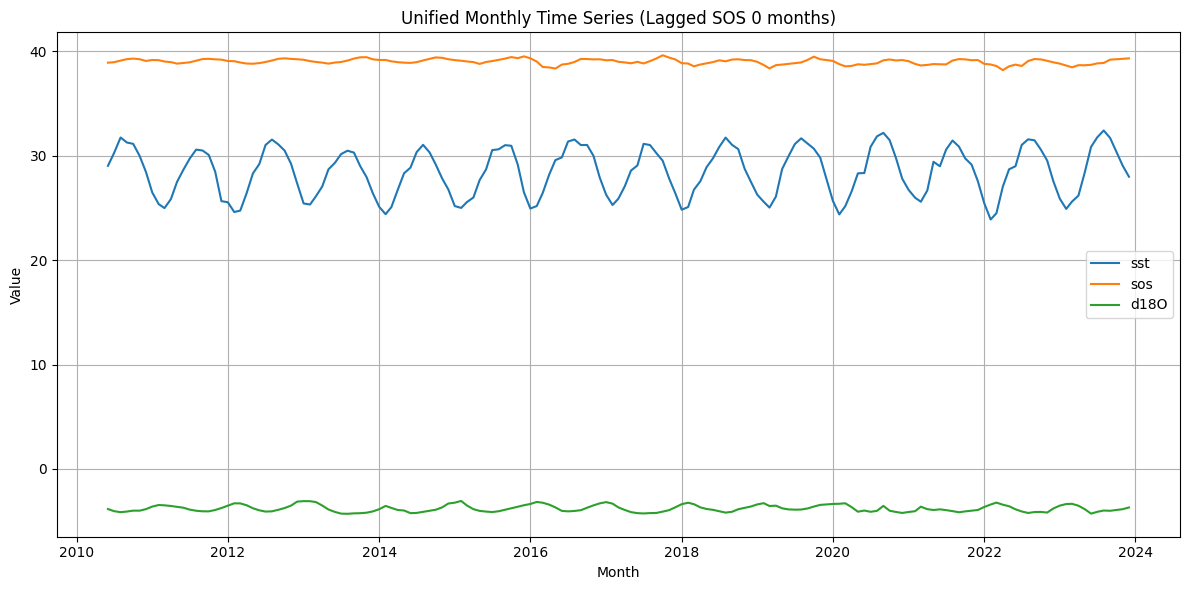

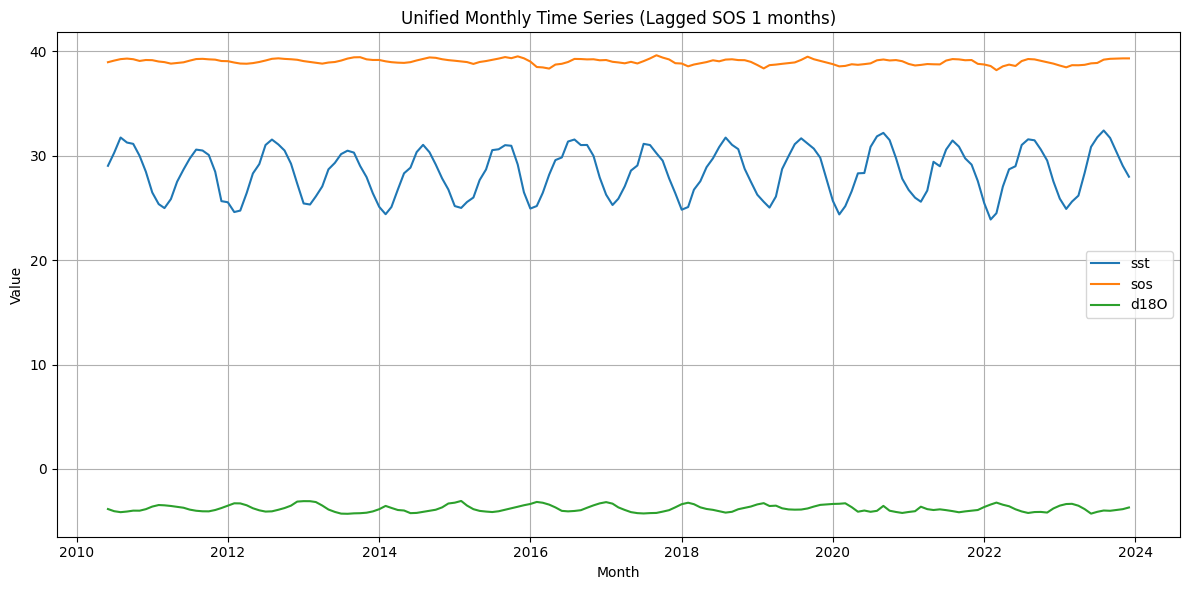

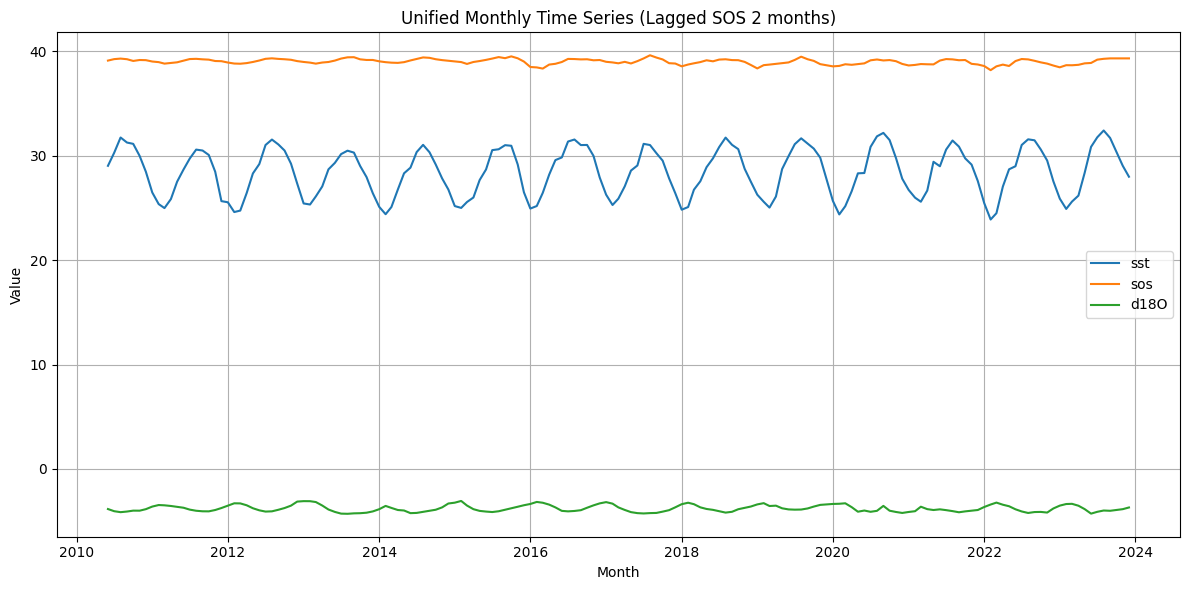

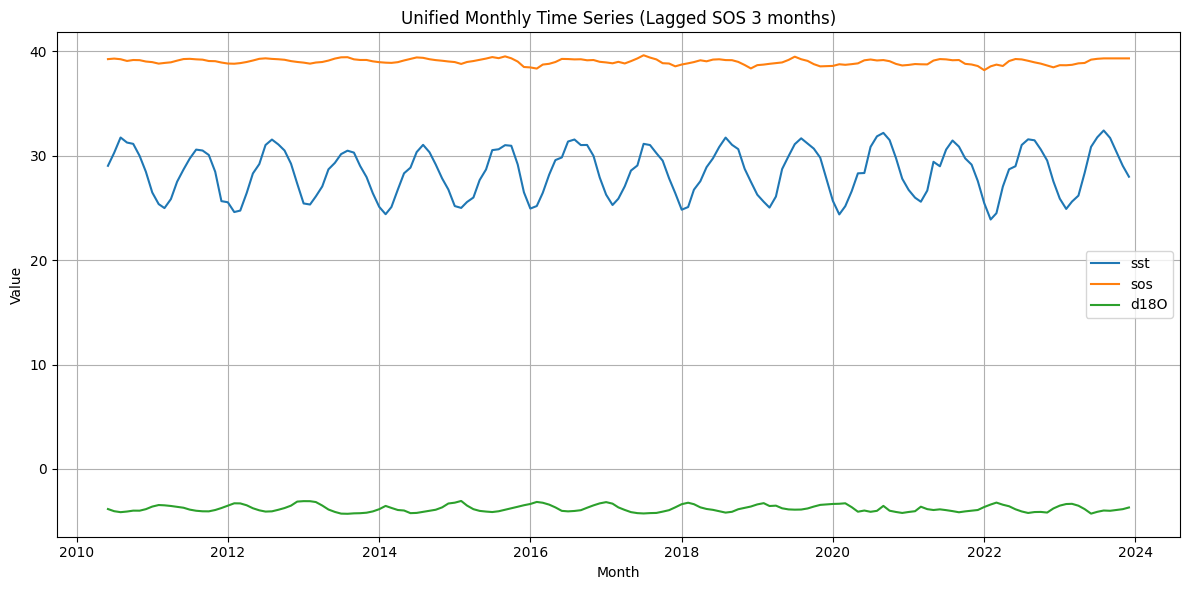

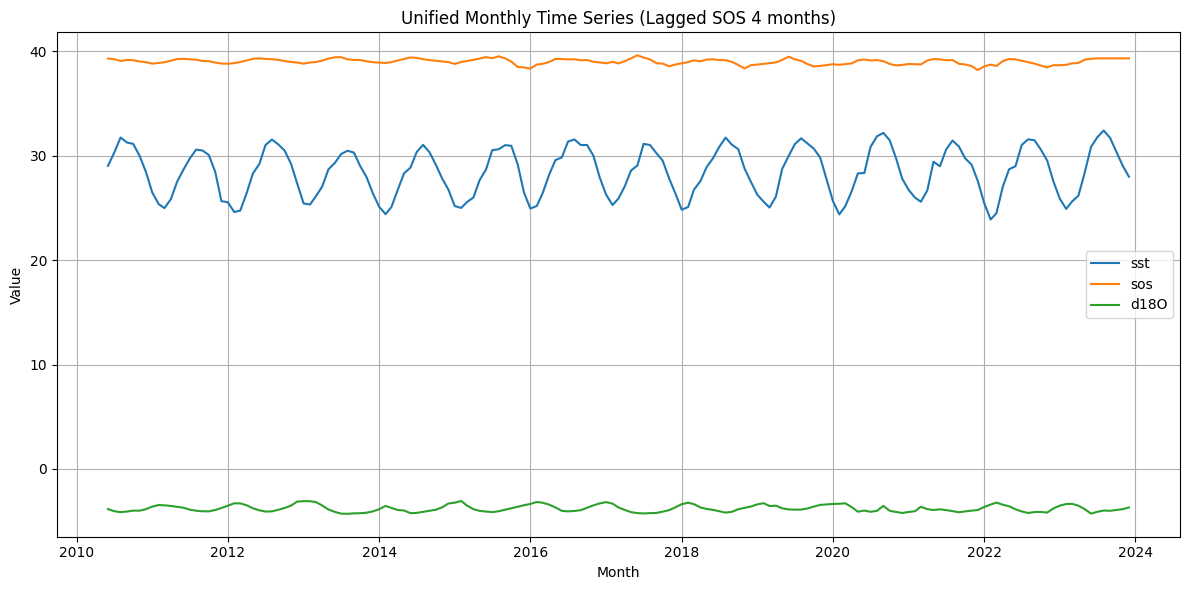

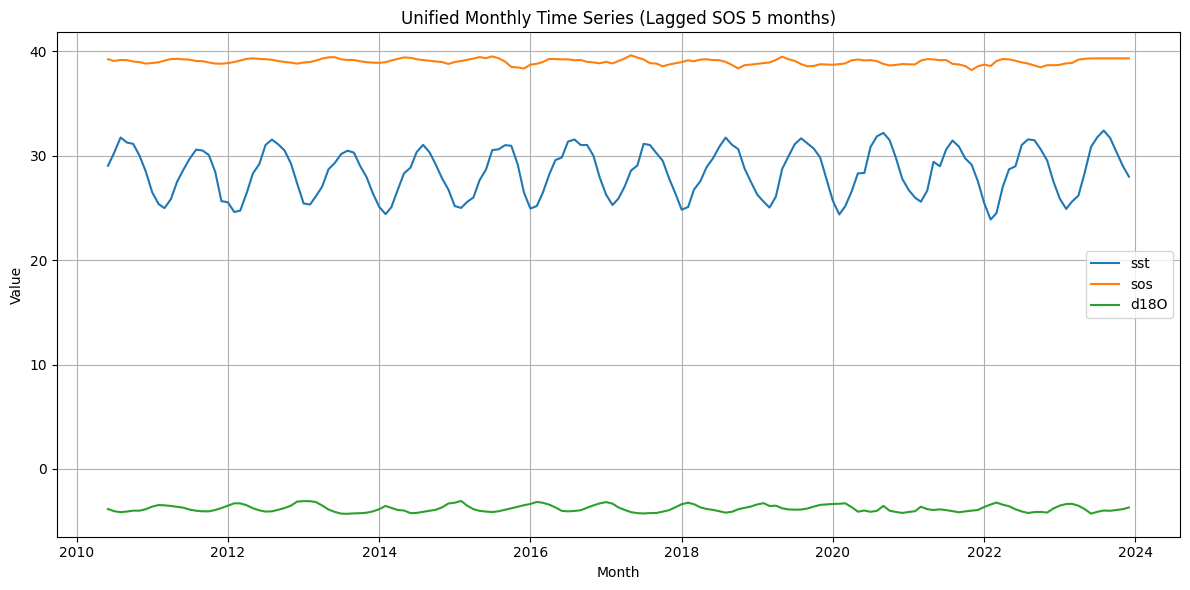

In [20]:
# Graph the lagged features on the same plot
for i in range(-5, 6):
    if i == 0:
        lagged_df = df
    else:
        lagged_df = dataframes[i]
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        if col != "month" and col != "sss":
            plt.plot(lagged_df["month"], lagged_df[col], label=col)
    
    plt.title("Unified Monthly Time Series (Lagged SOS " + str(i) + " months)")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     80.60
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.24e-24
Time:                        21:28:33   Log-Likelihood:                 11.351
No. Observations:                 156   AIC:                            -16.70
Df Residuals:                     153   BIC:                            -7.553
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7750      0.018   -207.539      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


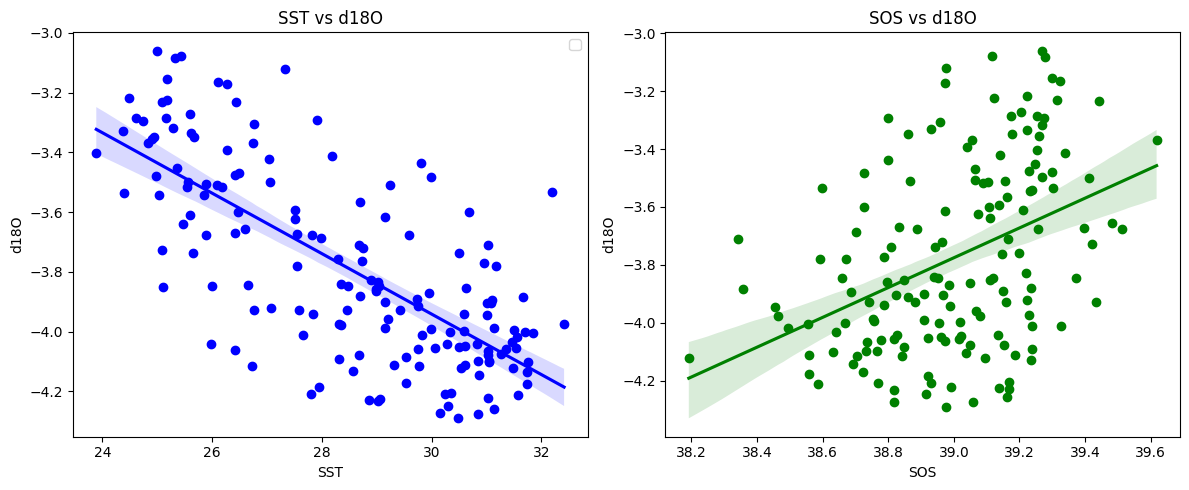

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     80.57
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.14e-24
Time:                        21:28:33   Log-Likelihood:                 11.430
No. Observations:                 157   AIC:                            -16.86
Df Residuals:                     154   BIC:                            -7.691
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7763      0.018   -208.298      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


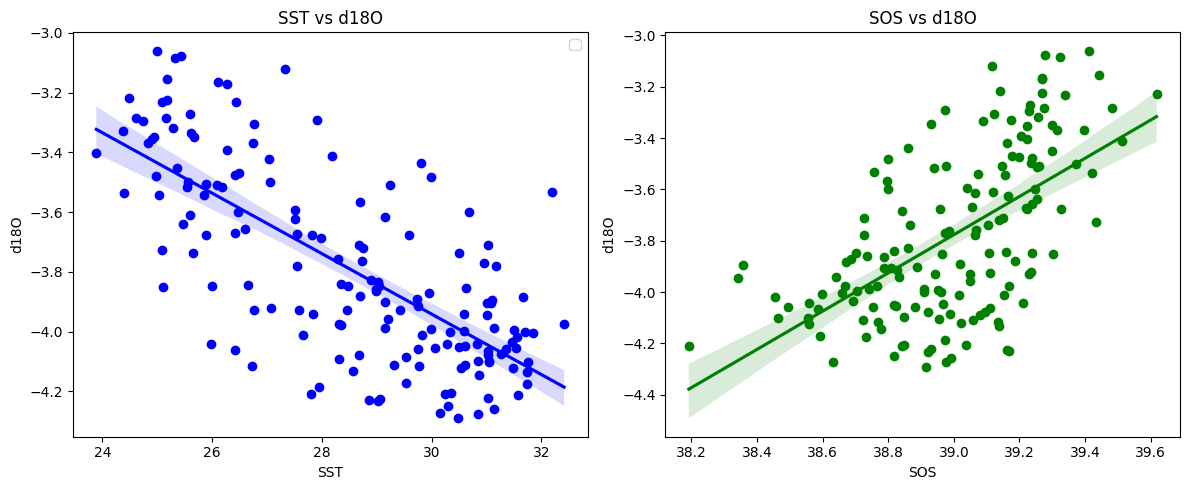

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     82.90
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           3.29e-25
Time:                        21:28:33   Log-Likelihood:                 12.475
No. Observations:                 158   AIC:                            -18.95
Df Residuals:                     155   BIC:                            -9.762
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7782      0.018   -210.368      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


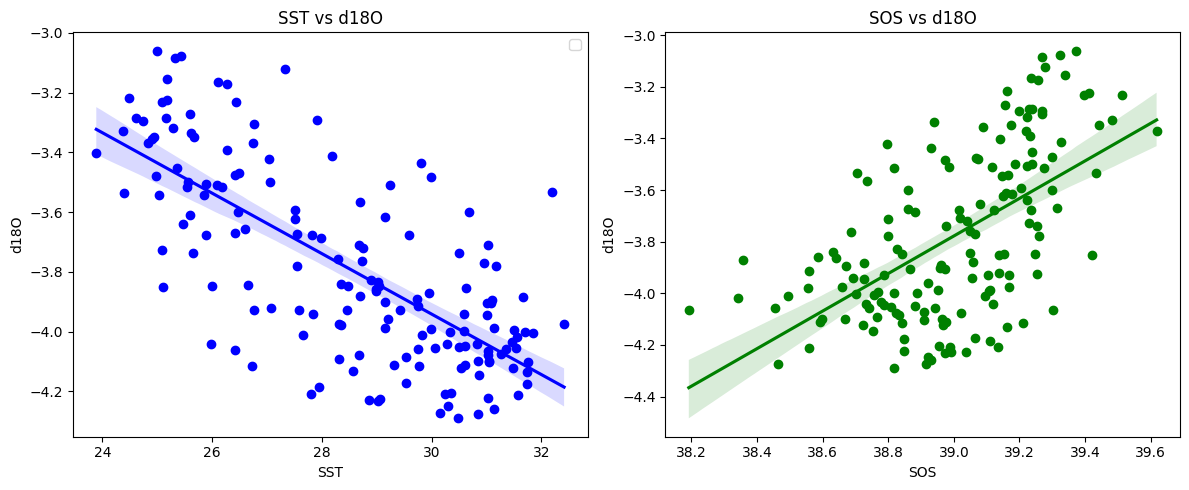

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     83.63
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.08e-25
Time:                        21:28:33   Log-Likelihood:                 12.544
No. Observations:                 159   AIC:                            -19.09
Df Residuals:                     156   BIC:                            -9.882
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7805      0.018   -211.158      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


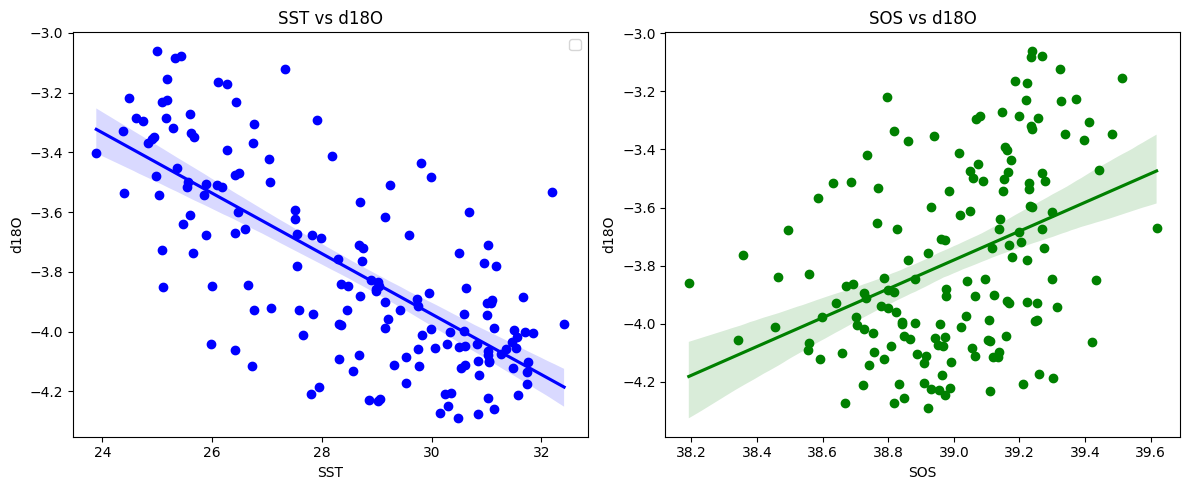

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     84.30
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.36e-25
Time:                        21:28:34   Log-Likelihood:                 12.859
No. Observations:                 160   AIC:                            -19.72
Df Residuals:                     157   BIC:                            -10.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7821      0.018   -212.237      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


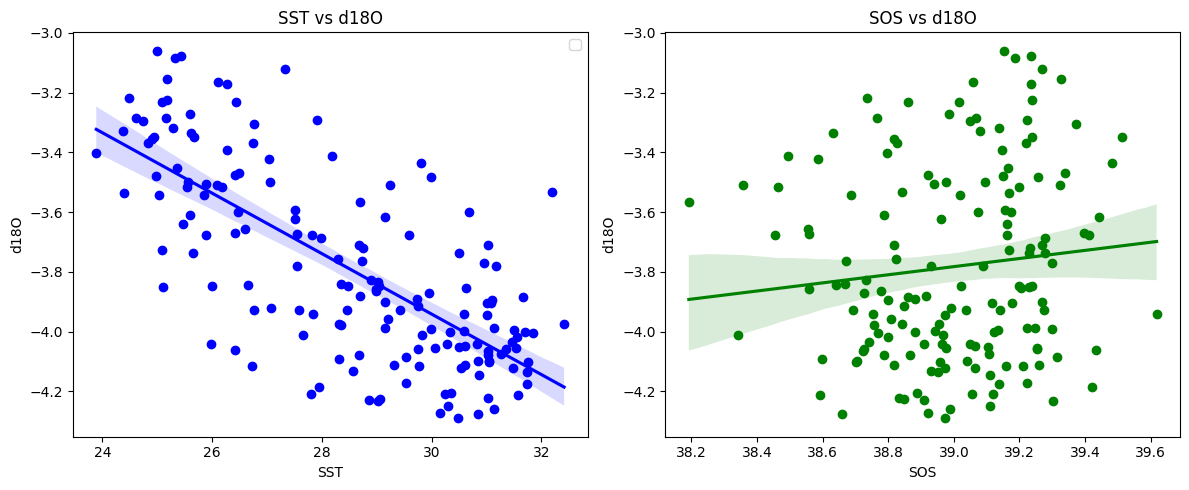

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     84.79
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           9.63e-26
Time:                        21:28:34   Log-Likelihood:                 13.406
No. Observations:                 161   AIC:                            -20.81
Df Residuals:                     158   BIC:                            -11.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.018   -213.549      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


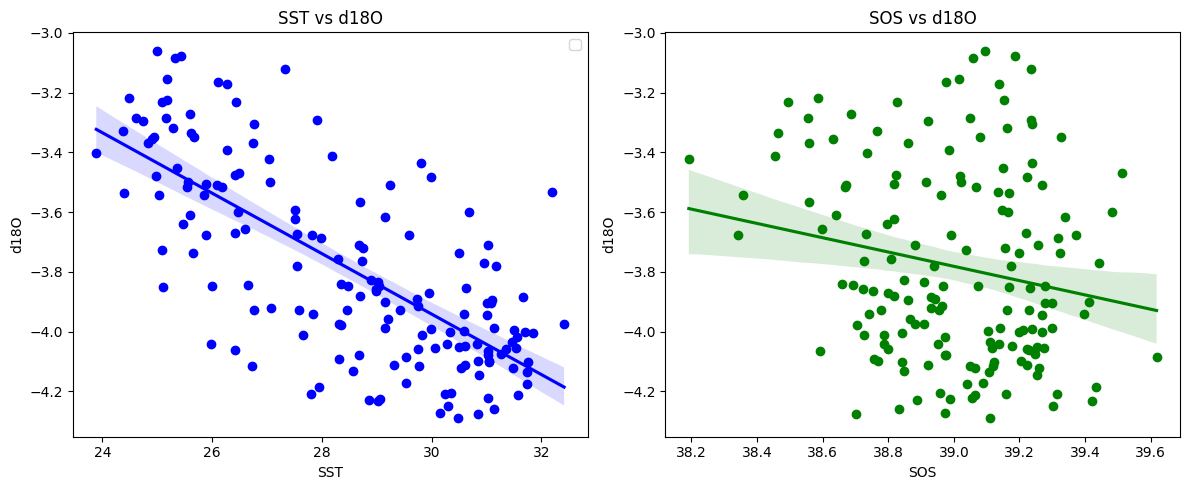

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     85.01
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           8.67e-26
Time:                        21:28:34   Log-Likelihood:                 13.514
No. Observations:                 161   AIC:                            -21.03
Df Residuals:                     158   BIC:                            -11.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.018   -213.691      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


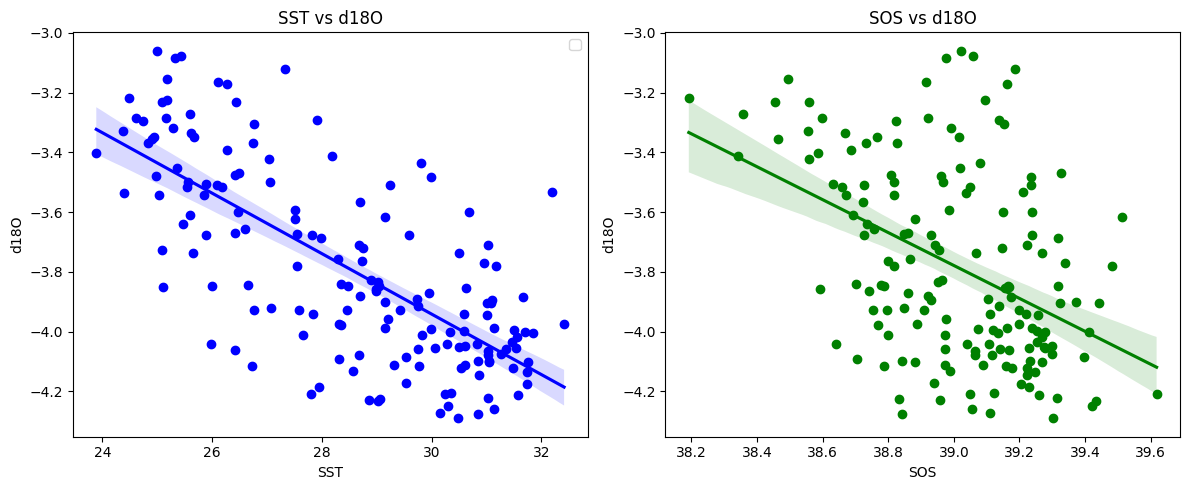

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     86.28
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           4.71e-26
Time:                        21:28:34   Log-Likelihood:                 14.135
No. Observations:                 161   AIC:                            -22.27
Df Residuals:                     158   BIC:                            -13.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.018   -214.518      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


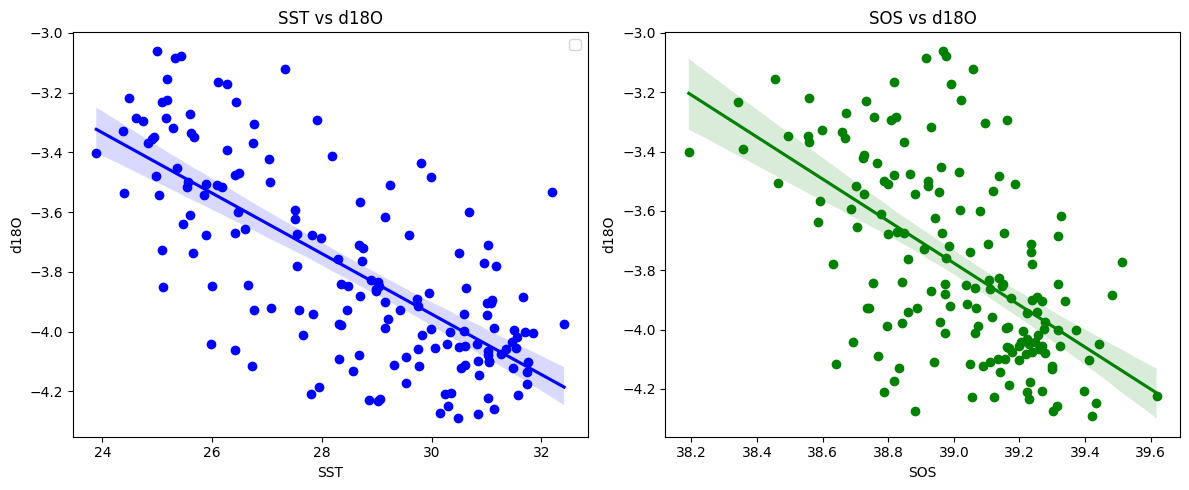

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     88.91
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.35e-26
Time:                        21:28:34   Log-Likelihood:                 15.405
No. Observations:                 161   AIC:                            -24.81
Df Residuals:                     158   BIC:                            -15.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.017   -216.217      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


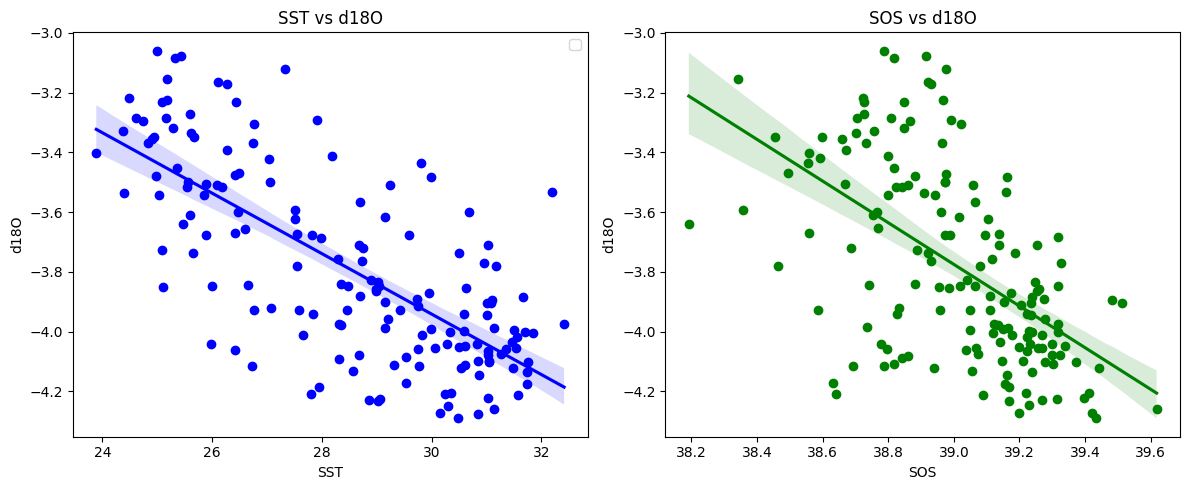

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     89.40
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.07e-26
Time:                        21:28:34   Log-Likelihood:                 15.642
No. Observations:                 161   AIC:                            -25.28
Df Residuals:                     158   BIC:                            -16.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.017   -216.535      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


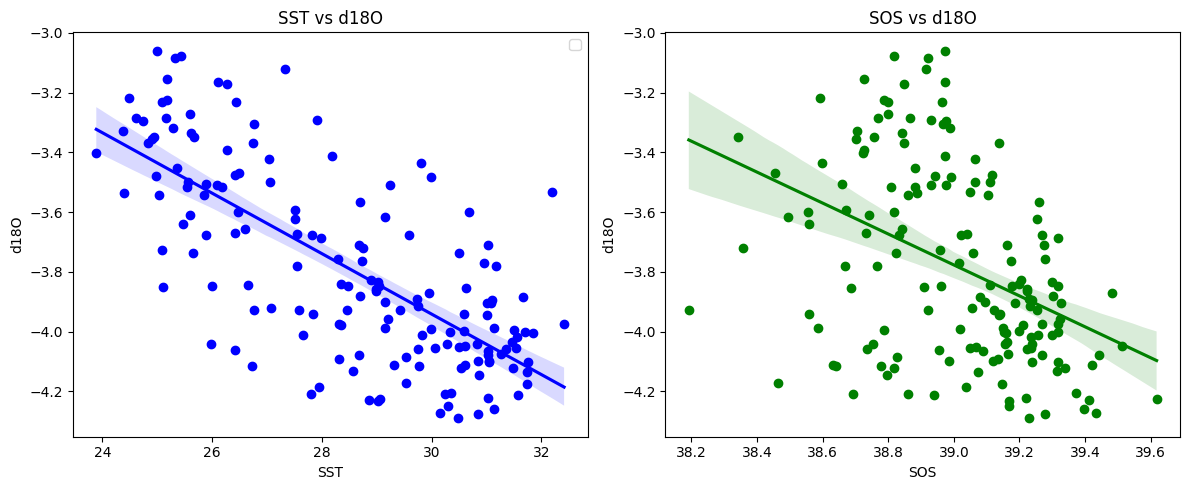

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     89.50
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.03e-26
Time:                        21:28:35   Log-Likelihood:                 15.687
No. Observations:                 161   AIC:                            -25.37
Df Residuals:                     158   BIC:                            -16.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.017   -216.595      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_33397/1946778839.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


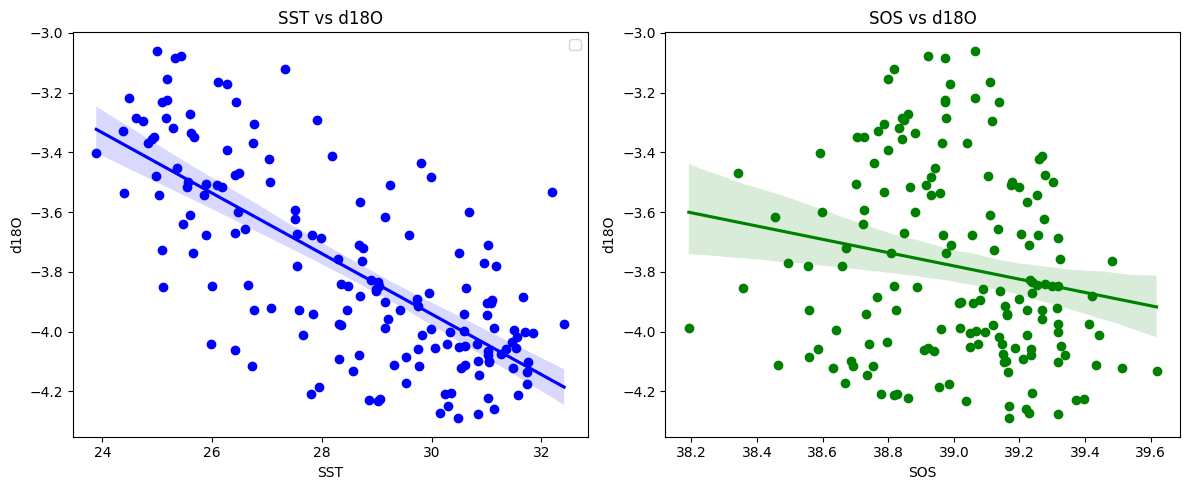

In [21]:
from IPython.display import display, HTML

# Multiple Linear Regression with lagged SOS
for i in range(-5, 6):
    if i == 0:
        df_lagged = df
    else:
        df_lagged = dataframes[i]
    print('-' * 100)
    display(HTML(f'<span style="font-size:20px; font-weight:bold;">Regression with lagged SOS {i} months:</span>'))
    X = df_lagged[['sst', 'sos']]
    y = df_lagged['d18O']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = sm.add_constant(X_scaled)
    model = sm.OLS(y, X_scaled).fit()
    print(model.summary())

    X_sst = sm.add_constant(df['sst'])
    model_sst = sm.OLS(df['d18O'], X_sst).fit()
    print("R² for SST only:", model_sst.rsquared)

    X_salinity = sm.add_constant(df_lagged['sos'])
    model_salinity = sm.OLS(df_lagged['d18O'], X_salinity).fit()
    print("R² for SOS only:", model_salinity.rsquared)

    # Visualize
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].scatter(df['sst'], df['d18O'], color='blue')
    sns.regplot(x='sst', y='d18O', data=df, scatter=False, ax=axs[0], color='blue', line_kws={'label': 'Best Fit Line'})
    axs[0].legend()
    axs[0].set_title("SST vs d18O")
    axs[0].set_xlabel("SST")
    axs[0].set_ylabel("d18O")

    axs[1].scatter(df_lagged['sos'], df_lagged['d18O'], color='green')
    sns.regplot(x='sos', y='d18O', data=df_lagged, scatter=False, ax=axs[1], color='green', line_kws={'label': 'Best Fit Line'})
    axs[1].set_title("SOS vs d18O")
    axs[1].set_xlabel("SOS")
    axs[1].set_ylabel("d18O")

    plt.tight_layout()
    plt.show()